In [13]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer

from FusionLatticesAnalysis.LatticeFunctions.RaussendorfLattice import RaussendorfLattice
from FusionLatticesAnalysis.RaussLattice import decoder_successprob_error_vs_loss_list_parallelized as decoder

# Example: Build the Raussendorf lattice

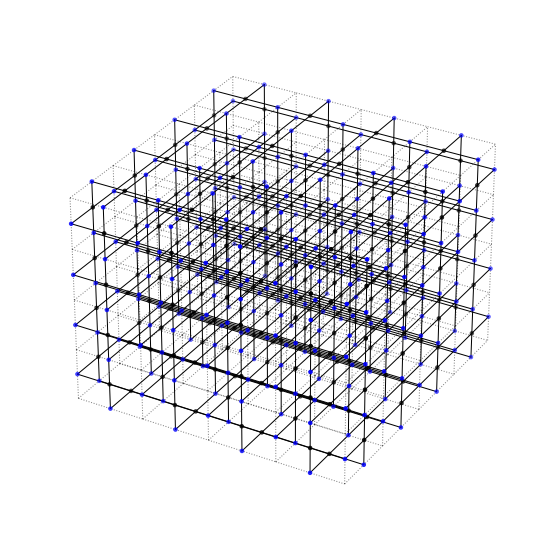

# prim qbts: 240 240
# dual qbts: 300 300

 primal cells struct:
[[  0   3   1  14   2  58]
 [  3   6   4  17   5  61]
 [  6   9   7  20   8  64]
 [  9  12  10  23  11  67]
 [ 13  16  14  27  15  71]
 [ 16  19  17  30  18  74]
 [ 19  22  20  33  21  77]
 [ 22  25  23  36  24  80]
 [ 26  29  27  40  28  84]
 [ 29  32  30  44  31  87]
 [ 32  35  33  48  34  90]
 [ 35  38  36  52  37  93]
 [ 39  43  40  42  41  97]
 [ 43  47  44  46  45 101]
 [ 47  51  48  50  49 105]
 [ 51  54  52  55  53 109]
 [ 56  59  57  70  58 114]
 [ 59  62  60  73  61 117]
 [ 62  65  63  76  64 120]
 [ 65  68  66  79  67 123]
 [ 69  72  70  83  71 127]
 [ 72  75  73  86  74 130]
 [ 75  78  76  89  77 133]
 [ 78  81  79  92  80 136]
 [ 82  85  83  96  84 140]
 [ 85  88  86 100  87 143]
 [ 88  91  89 104  90 146]
 [ 91  94  92 108  93 149]
 [ 95  99  96  98  97 153]
 [ 99 103 100 102 101 157]
 [103 107 104 106 105 161]
 [107 110 108 111 109 165]
 [112 115 113 126 114 170]
 [115 118 116 129 117 174]
 [118 121 119 132

In [18]:
L_x = 4
L_y = 4
L_t = 4
boundary_is_primal = ((True, True), (True, True), (True, True))

Rauss_Lattice = RaussendorfLattice(L_x, L_y, L_t, boundary_is_primal)

Rauss_Lattice.draw_lattice()

print('# prim qbts:', len(Rauss_Lattice.primal_nodes_positions), Rauss_Lattice.num_primal_qbts)
print('# dual qbts:', len(Rauss_Lattice.dual_nodes_positions), Rauss_Lattice.num_dual_qbts)

print('\n primal cells struct:')
print(Rauss_Lattice.primal_cells_qbts_struct)

# print('\n primal cells matching matrix:')
H_matrix = Rauss_Lattice.get_matching_matrix(latt_type='primal')
# print(H_matrix)





qubit_error_list: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

meas_syndroms_list: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


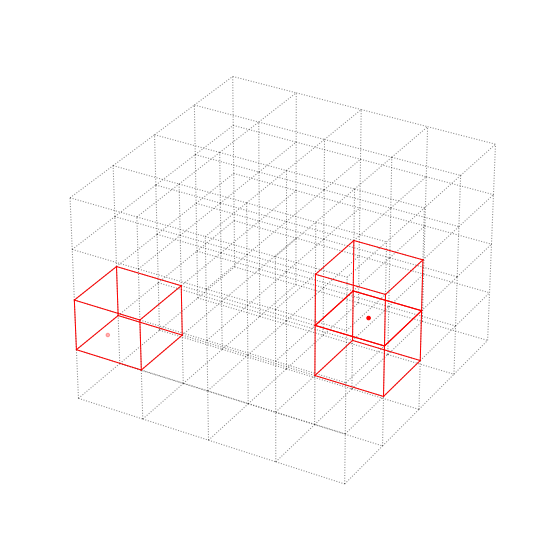

In [15]:
# sample a random list of Pauli Z errors on the physical qubits and plot error qubits and syndroms

pauli_Z_error_prob = 0.02
qubit_error_list = np.random.binomial(1, pauli_Z_error_prob, Rauss_Lattice.num_primal_qbts)

print('\nqubit_error_list:', qubit_error_list)
meas_syndroms_list = (H_matrix @ qubit_error_list) % 2
print('\nmeas_syndroms_list:', meas_syndroms_list)

Rauss_Lattice.draw_odd_syndromes(meas_syndroms_list, qubit_error_list)

# Example: test fault-tolerance performance of Raussendorf lattice

### Loss-only error model

   Doing L= 4
   Doing L= 6
   Doing L= 8
Completed in  10.030545708956197  s


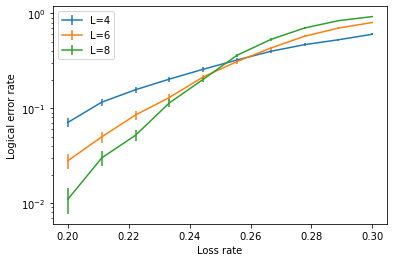

In [16]:
### Identify loss threshold for the lattice, assuming no Pauli errors
### Runs in approximately 10 seconds

loss_min = 0.2
loss_max = 0.3

num_trials = 1000

num_steps = 10

L_list = np.arange(4, 9, 2)

eras_ps = np.linspace(loss_min, loss_max, num_steps)
err_vs_eras_vals = np.array([(0, eras_p) for eras_p in eras_ps])

plt.figure()
start_t = default_timer()
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    ### Parallelized Monte-Carlo tests decoding errors
    this_data = \
        decoder(err_vs_eras_vals, L, num_loss_trials=num_trials, num_ec_runs_per_loss_trial=1)

    plt.errorbar(eras_ps, this_data,
                 yerr=(this_data * (1 - this_data) / num_trials) ** 0.5,
                 label="L={}".format(L))

end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')
plt.yscale('log')
plt.xlabel("Loss rate")
plt.ylabel("Logical error rate")
plt.legend()
plt.show()

### Error-only error model

   Doing L= 4
   Doing L= 6
   Doing L= 8
Completed in  2.023976911092177  s


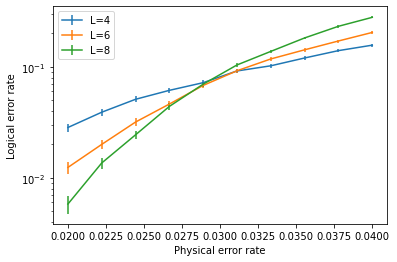

In [17]:
### Identify an Puali error rate threshold for the lattice, assuming no loss
### Runs in approximately 2 seconds

err_min = 0.02
err_max = 0.04

num_trials = 5000

num_steps = 10

L_list = np.arange(4, 9, 2)

err_ps = np.linspace(err_min, err_max, num_steps)
err_vs_eras_vals = np.array([(err_p, 0.) for err_p in err_ps])

plt.figure()
start_t = default_timer()
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = \
        decoder(err_vs_eras_vals, L, num_loss_trials=num_trials, num_ec_runs_per_loss_trial=1)

    plt.errorbar(err_ps, this_data,
                 yerr=(this_data * (1 - this_data) / num_trials) ** 0.5,
                 label="L={}".format(L))

end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')
plt.yscale('log')
plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")
plt.legend()
plt.show()

### Both errors and losses

Error rate, Loss rate
[[0.00309017 0.04755283]
 [0.00375235 0.06589463]
 [0.00441453 0.08423643]
 [0.00507671 0.10257824]
 [0.00573889 0.12092004]
 [0.00640107 0.13926185]
 [0.00706325 0.15760365]
 [0.00772542 0.17594546]
 [0.0083876  0.19428726]
 [0.00904978 0.21262906]
 [0.00971196 0.23097087]
 [0.01037414 0.24931267]
 [0.01103632 0.26765448]
 [0.0116985  0.28599628]
 [0.01236068 0.30433809]] 

   Doing L= 3
   Doing L= 5
   Doing L= 7
Completed in  91.13832886097953  s


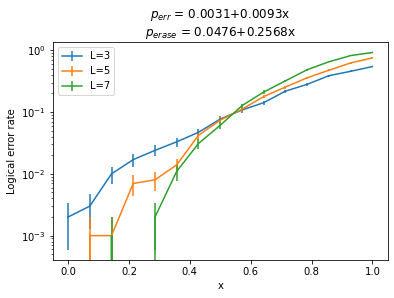

In [20]:
### Identify a threshold for the lattice in presence of both Pauli errors and losses

### For a given theta, loss and error rates are given by linear interpolations:
### loss = (loss_max - loss_min + x*loss_min) * cos(theta)
### error = (err_max - err_min + x*err_min) * sin(theta)
### with x ranging 0 to 1 in the scan.

### Runs in approximately 1 minute

loss_min = 0.05
loss_max = 0.32

err_min = 0.01
err_max = 0.04

num_loss_trials = 1000
num_ec_runs_per_loss_trial = 1

num_steps = 15
num_scans = 5

L_list = np.arange(3, 8, 2)


theta =  2*np.pi / 5.

x_vals = np.linspace(0, 1, num_steps)

err_vs_eras_vals_allvals = []
all_data = np.array([[None] * len(L_list)] * num_scans)

err_offset = err_min * np.cos(theta)
err_m = (err_max - err_min) * np.cos(theta)

loss_offset = loss_min * np.sin(theta)
loss_m = (loss_max - loss_min) * np.sin(theta)


err_vs_eras_vals = np.array([(err_m * x + err_offset,
                              loss_m * x + loss_offset) for x in x_vals])
print('Error rate, Loss rate')
print(err_vs_eras_vals, '\n')


plt.figure()
start_t = default_timer()
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = decoder(err_vs_eras_vals, L, num_loss_trials=num_loss_trials, num_ec_runs_per_loss_trial=num_ec_runs_per_loss_trial)
    
    plt.errorbar(x_vals, this_data,
                 yerr=(this_data * (1 - this_data) / (num_loss_trials * num_ec_runs_per_loss_trial)) ** 0.5,
                 label="L={}".format(L))
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')

plt.yscale('log')
plt.xlabel("x")
plt.ylabel("Logical error rate")

if np.sin(theta)==0:
    title_label_err = r'$p_{err}$ = '+str(err_offset)
else:
    title_label_err = r'$p_{err}$ = '+str(np.round(err_offset,4))+'+'+str(np.round(err_m,4))+'x'

if np.cos(theta)==0:
    title_label_loss = r'$p_{erase}$ = '+str(loss_offset)
else:
    title_label_loss = r'$p_{erase}$ = '+str(np.round(loss_offset,4))+'+'+str(np.round(loss_m,4))+'x'
      
plt.title(title_label_err+'\n'+title_label_loss)
plt.legend()
plt.show()
